In [50]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('btcusdt_1m.csv')
def calc_capital(index):
    return (usdt + btc * df['Close'][index])
total_returns = []

Index: 0, USDT: 100000, BTC: 0, Holding: False, Close Price: 41476.18
Index: 1, USDT: 100000, BTC: 0, Holding: False, Close Price: 41441.32
Index: 2, USDT: 100000, BTC: 0, Holding: False, Close Price: 41394.28
Index: 3, USDT: 100000, BTC: 0, Holding: False, Close Price: 41421.26
Index: 4, USDT: 100000, BTC: 0, Holding: False, Close Price: 41424.95
Index: 5, USDT: 100000, BTC: 0, Holding: False, Close Price: 41400.91
Index: 6, USDT: 100000, BTC: 0, Holding: False, Close Price: 41430.47
Index: 7, USDT: 100000, BTC: 0, Holding: False, Close Price: 41420.27
Index: 8, USDT: 100000, BTC: 0, Holding: False, Close Price: 41361.36
Index: 9, USDT: 100000, BTC: 0, Holding: False, Close Price: 41389.36
Index: 10, USDT: 100000, BTC: 0, Holding: False, Close Price: 41405.46
Index: 11, USDT: 100000, BTC: 0, Holding: False, Close Price: 41378.02
Index: 12, USDT: 100000, BTC: 0, Holding: False, Close Price: 41371.11
Index: 13, USDT: 100000, BTC: 0, Holding: False, Close Price: 41399.42
Index: 14, USDT:

Index: 7738, USDT: 0, BTC: 2.376644988588074, Holding: True, Close Price: 41187.91
Index: 7739, USDT: 0, BTC: 2.376644988588074, Holding: True, Close Price: 41196.18
Index: 7740, USDT: 0, BTC: 2.376644988588074, Holding: True, Close Price: 41178.02
Index: 7741, USDT: 0, BTC: 2.376644988588074, Holding: True, Close Price: 41182.59
Index: 7742, USDT: 0, BTC: 2.376644988588074, Holding: True, Close Price: 41184.24
Index: 7743, USDT: 0, BTC: 2.376644988588074, Holding: True, Close Price: 41180.96
Index: 7744, USDT: 97869.58603357966, BTC: 0, Holding: False, Close Price: 41164.04
Index: 7745, USDT: 97869.58603357966, BTC: 0, Holding: False, Close Price: 41174.01
Index: 7746, USDT: 97869.58603357966, BTC: 0, Holding: False, Close Price: 41134.01
Index: 7747, USDT: 97869.58603357966, BTC: 0, Holding: False, Close Price: 41137.3
Index: 7748, USDT: 97869.58603357966, BTC: 0, Holding: False, Close Price: 41200.19
Index: 7749, USDT: 0, BTC: 2.3753931704198123, Holding: True, Close Price: 41158.5


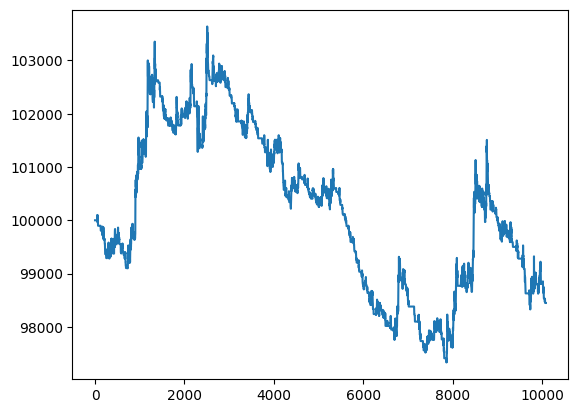

In [51]:
#for period in range(10, 201):
usdt = 100000
btc = 0
period = 50
holding = False
capital_history = []
commission = 0.00003
trade = 0
df['signal'] = 0
df['ma'] = talib.SMA(df['Close'].values, timeperiod=period)
df.loc[period:, 'signal'] = np.where(df['Close'][period:] > df['ma'][period:], 1, 0)
df['position'] = df['signal'].diff()
for i in range(len(df)):
    print(f"Index: {i}, USDT: {usdt}, BTC: {btc}, Holding: {holding}, Close Price: {df['Close'][i]}")
    if df['position'][i] == 1 and not holding:  # Buy
        btc = usdt / df['Close'][i] * (1 - commission)
        usdt = 0
        holding = True  # Deduct commission from capital
        trade += 1
    elif df['position'][i] == -1 and holding:  # Sell
        usdt = btc * df['Close'][i] * (1 - commission)
        btc = 0  # Deduct commission from capital
        holding = False
        trade += 1
    capital_history.append(calc_capital(i))
total_return = (capital_history[-1] - 100000) / 100000

print("Trades: {}".format(trade))
print("Total Return: {:.2f}%".format(total_return * 100))
plt.plot(capital_history)
plt.show()

In [52]:
df.head()
df.tail()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,signal,ma,position
10076,2023-12-19 23:56:00,42278.67,42290.82,42278.67,42290.82,8.76826,2023-12-19 23:56:59.999,370732.627743,432,7.42208,313814.713549,0,0,42297.2352,0.0
10077,2023-12-19 23:57:00,42290.81,42291.09,42272.18,42272.19,11.86417,2023-12-19 23:57:59.999,501645.693144,676,6.27982,265525.428535,0,0,42294.5992,0.0
10078,2023-12-19 23:58:00,42272.18,42281.02,42261.10,42261.10,12.75264,2023-12-19 23:58:59.999,539121.541852,604,6.16722,260729.088729,0,0,42291.9754,0.0
10079,2023-12-19 23:59:00,42261.11,42276.00,42261.10,42275.99,14.59783,2023-12-19 23:59:59.999,616996.633348,428,9.99050,422271.524469,0,0,42289.6132,0.0
10080,2023-12-20 00:00:00,42275.99,42277.73,42266.82,42266.82,15.69885,2023-12-20 00:00:59.999,663651.323565,691,6.81230,287974.238026,0,0,42287.3226,0.0
